In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# inline으로 출력
%matplotlib inline
# 비 대화형
plt.ioff()


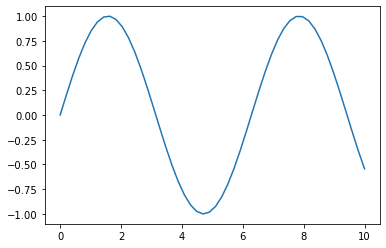

In [5]:
x = np.linspace(0, 10, 50)
sinus = np.sin(x)
plt.plot(x, sinus)
plt.show()

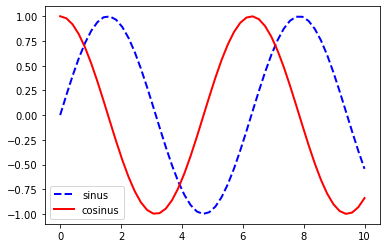

In [6]:
cosinus = np.cos(x)
plt.plot(x, sinus, label="sinus", color="blue",
        linestyle="--",linewidth=2)
plt.plot(x, cosinus, label="cosinus", color="red",
        linestyle="-",linewidth=2)
plt.legend()
plt.show()

In [8]:
import pandas as pd
#봉급 예제 산포도 그리기
url = "https://raw.github.com/neurospin/pystatsml/master/datasets/salary_table.csv"
salary = pd.read_csv(url)
salary.head()

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


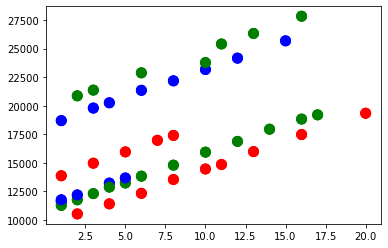

In [11]:
df = salary
colors = colors_edu = {"Bachelor" :"r", "Master":"g", "Ph.D":"blue"}
plt.scatter(df["experience"], df["salary"],
           c=df["education"].apply(lambda x:colors[x]), s = 100)
plt.show()

In [12]:
# matplotlib에서 qt5로 그래프 출력
%matplotlib qt5

plt.ion()

In [15]:
symbols_manag = dict(Y="*", N=".")

# group by education x amangement => 6group
for values,d in salary.groupby(["education", "management"]):
    edu, manager = values
    plt.scatter(d["experience"], d["salary"],
               marker=symbols_manag[manager],color=colors_edu[edu],
               s=150,label=manager+"/"+edu)
#set label
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend(loc=4) #lower right

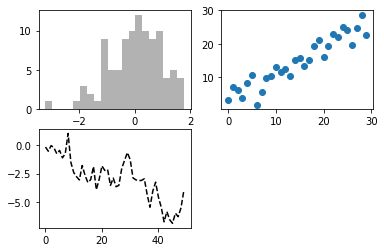

In [19]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(np.random.randn(100), bins=20, color="k", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(),"k--")
plt.show()

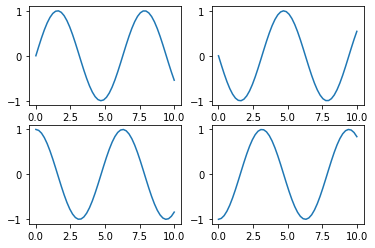

In [20]:
#subplots()함수 사용하기
fig, axs = plt.subplots(2,2)
axs[0,0].plot(x, sinus)
axs[0,1].plot(x, -sinus)
axs[1,0].plot(x, cosinus)
axs[1,1].plot(x, -cosinus)

plt.show()

In [24]:
import seaborn as sns
sns.set(style="darkgrid")
iris=sns.load_dataset("iris")
print(iris.columns)
iris.columns = ["sl", "sw", "pl", "pw", "sp"]
iris.head()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


,sl,sw,pl,pw,sp
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


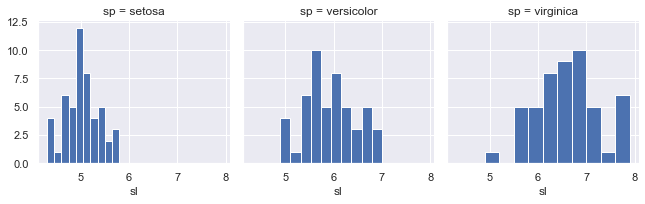

In [28]:
# sp 별 그리드 생성, 히스토그램으로 sl 플롯
g = sns.FacetGrid(iris,col="sp")
g = g.map(plt.hist, "sl")

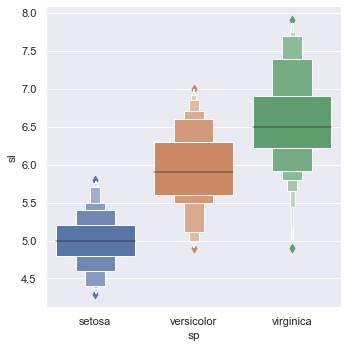

In [29]:
#카테고리별 플롯
sns.catplot(x="sp", y="sl", kind="boxen", data=iris)

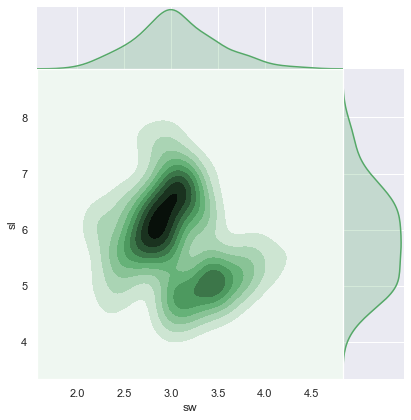

In [30]:
#결합 분포 플로팅
sns.jointplot(x="sw", y="sl", data=iris, kind="kde", space=0, color="g")

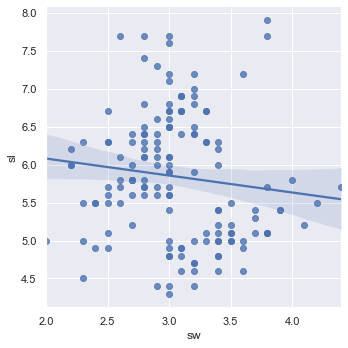

In [32]:
# 회귀선 플롯
sns.lmplot(x="sw", y="sl", data=iris)

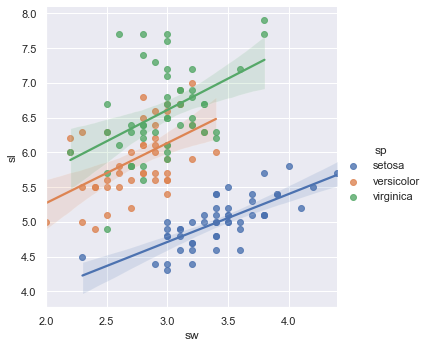

In [33]:
# sp별 회귀선과 hue 
sns.lmplot(x="sw", y="sl", data=iris, hue="sp")